# Odds Ratio

Odds ratio measures how strongly two **binary variables** are associated with each other.

# Graphical Summary

![Fig](./graphical_summary/slides/Slide8.png)

# Key Formula

When we have two binary variables (each can take values 0 or 1), we often want to measure how strongly they are associated with each other.

To organize and analyze the relationship between these two binary variables, we create a 2×2 contingency table that shows all possible combinations:

|            | Variable 1=0 | Variable 1=1 |
|------------|--------------|--------------|
| Variable 2=0 |      $N_{00}$       |      $N_{10}$       |
| Variable 2=1 |      $N_{01}$       |      $N_{11}$       |

($N_{ij}$ = count of individuals with Variable 1=$i$ and Variable 2=$j$)

**Odds for Variable 2=0:** $\frac{N_{00}}{N_{10}}$

**Odds for Variable 2=1:** $\frac{N_{01}}{N_{11}}$

**Odds Ratio:** 

$$
OR = \frac{\text{Odds for Variable 2=0}}{\text{Odds for Variable 2=1}} = \frac{\frac{N_{00}}{N_{10}}}{\frac{N_{01}}{N_{11}}} = \frac{N_{00} \times N_{11}}{N_{10} \times N_{01}}
$$

# Technical Details

## What are Odds?

Odds tell you how much more likely something is to happen compared to not happen.

$$
\text{Odds} = \frac{p}{1-p}
$$

**Example:** If 20% of people get a disease, then 80% don't get it.
- Odds = $\frac{0.2}{0.8} = 0.25$ 
- This means "for every 4 people who don't get the disease, 1 person gets it"
- We can say the odds are "1 to 4" or "1:4"

## Logistic Regression

Logistic regression is used when we want to predict a binary outcome (yes/no, diseased/healthy, success/failure).

**The Problem:** Regular linear regression can give predictions outside 0-1 range, which doesn't make sense for probabilities.

**The Solution:** Instead of modeling probability directly, we model the **log-odds** (logit):

$$
\ln\left(\frac{p}{1-p}\right) = a + \beta X
$$

**Why this works:**
- Log-odds can be any number from $-\infty$ to $\infty$
- We can use linear regression on log-odds
- Then transform back to get probabilities between 0 and 1

**Key insight:** The coefficient $\beta$ tells us how much the log-odds change for each unit increase in X. Since $OR = e^{\beta}$, we get the odds ratio directly from the regression!

## Chi-Square Test

The chi-square test helps us determine if the odds ratio we calculated is statistically significant (not due to random chance).

**What it tests:** Whether two variables are independent or associated in a contingency table.

**Null hypothesis:** $H_0$: The two variables are independent (OR = 1)

**Test statistic:**

$$
\chi^2 = \sum \frac{(\text{Observed} - \text{Expected})^2}{\text{Expected}}
$$

**Simple interpretation:**
- Large $\chi^2$ value (p-value<0.05) -> Strong evidence against independence -> Variables are associated (Reject null hypothesis)
- Small $\chi^2$ value -> Weak evidence -> Variables might be independent

**Connection to OR:** If chi-square test is significant, then our calculated odds ratio is likely a real association, not just random variation.

# Related Topics

- [genotype coding](https://statfungen.github.io/statgen-primer/genotype_coding.html)
- [Hardy Weinberg equilibrium](https://statfungen.github.io/statgen-primer/Hardy_Weinberg_equilibrium.html)
- [ordinary least squares](https://statfungen.github.io/statgen-primer/ordinary_least_squares.html)

# Example

## Example 1 -- HWE

We know that under Hardy-Weinberg equilibrium, maternal and paternal alleles are chosen independently - just like our binomial expansion assumes. But how can we actually test this independence in real data? And what does it look like when this independence breaks down?

Let's use data from E.B. Ford's classic study on the scarlet tiger moth to see how we can set up a 2×2 table and use odds ratios to test for HWE.

Here's the original data from [E.B. Ford (1971) on the scarlet tiger moth](https://en.wikipedia.org/wiki/Hardy–Weinberg_principle):

| Phenotype          | White-spotted (AA) | Intermediate (Aa) | Little spotting (aa) | Total |
|--------------------|-------------------|-------------------|----------------------|-------|
| Number             | 1469              | 138               | 5                    | 1612  |


In [1]:
# Clear the environment
rm(list = ls())

# Data from E. B. Ford (1971) on the scarlet tiger moth
N_AA <- 1469  # White-spotted
N_Aa <- 138   # Intermediate
N_aa <- 5     # Little spotting
N_total <- N_AA + N_Aa + N_aa

# Calculate observed allele frequencies
N_A <- (2 * N_AA + N_Aa)
N_a <- (2 * N_aa + N_Aa)

f_A <- N_A / (2 * N_total)  # Frequency of A allele
f_a <- N_a / (2 * N_total)  # Frequency of a allele

cat("Allele frequencies:\n")
cat("f_A =", round(f_A, 4), "\n")
cat("f_a =", round(f_a, 4), "\n")

Allele frequencies:
f_A = 0.9541 
f_a = 0.0459 


Now let's set up our 2×2 contingency table to test independence of maternal and paternal alleles:


In [2]:
# Set up 2x2 contingency table for independence test
# For each Aa individual, we split equally between maternal A/paternal a and maternal a/paternal A
# since we can't distinguish these cases

maternal_A_paternal_A <- N_AA                    # AA genotypes
maternal_A_paternal_a <- N_Aa / 2                # Half of Aa genotypes
maternal_a_paternal_A <- N_Aa / 2                # Half of Aa genotypes  
maternal_a_paternal_a <- N_aa                    # aa genotypes

# Create the 2x2 table
contingency_table <- matrix(c(maternal_A_paternal_A, maternal_A_paternal_a,
                             maternal_a_paternal_A, maternal_a_paternal_a),
                           nrow = 2, byrow = TRUE)
rownames(contingency_table) <- c("Maternal A", "Maternal a")
colnames(contingency_table) <- c("Paternal A", "Paternal a")
contingency_table

,Paternal A,Paternal a
Maternal A,1469,69
Maternal a,69,5


Then we can calculate the odds ratio:

In [3]:
# Calculate odds ratio
a <- contingency_table[1,1]  # Maternal A, Paternal A
b <- contingency_table[1,2]  # Maternal A, Paternal a
c <- contingency_table[2,1]  # Maternal a, Paternal A
d <- contingency_table[2,2]  # Maternal a, Paternal a

odds_ratio <- (a * d) / (b * c)
cat("\nOdds Ratio =", round(odds_ratio, 4), "\n")


Odds Ratio = 1.5427 


The odds ratio tells us the magnitude of deviation from independence, but doesn't tell us if it's statistically significant. Under HWE, the odds ratio should equal 1.0, meaning maternal and paternal allele choices are independent.

To determine significance, we need a chi-square test that accounts for sample size and expected sampling variability. We can do this in two equivalent ways:

**Method 1: Chi-square test directly on the 2×2 table**


In [4]:
# Test independence using chi-square test on the 2x2 table
chi_sq_independence <- chisq.test(contingency_table, correct = FALSE)
print(chi_sq_independence)

Warning message in chisq.test(contingency_table, correct = FALSE):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 0.83095, df = 1, p-value = 0.362



**Method 2: Traditional HWE chi-square test on genotype counts**

In [5]:
# Calculate expected genotype counts under HWE
N_exp_AA <- f_A^2 * N_total
N_exp_Aa <- 2 * f_A * f_a * N_total
N_exp_aa <- f_a^2 * N_total

# Create comparison table
genotypes <- c("AA", "Aa", "aa")
N_observed <- c(N_AA, N_Aa, N_aa)
N_expected <- c(N_exp_AA, N_exp_Aa, N_exp_aa)
results <- data.frame(Genotype = genotypes, 
                     Observed = N_observed, 
                     Expected = round(N_expected, 1),
                     Difference = round(N_observed - N_expected, 1))
print(results)

  Genotype Observed Expected Difference
1       AA     1469   1467.4        1.6
2       Aa      138    141.2       -3.2
3       aa        5      3.4        1.6


In [6]:
# Perform chi-square test
chi_sq <- sum((N_observed - N_expected)^2 / N_expected)
degrees_freedom <- 1  # number of genotypes - number of independent alleles = 3 - 2 = 1
p_value <- 1 - pchisq(chi_sq, degrees_freedom)

cat("\nTraditional HWE chi-square test results:\n")
cat("Chi-square statistic =", round(chi_sq, 4), "\n")
cat("Degrees of freedom =", degrees_freedom, "\n")
cat("p-value =", format(p_value, scientific = TRUE), "\n")


Traditional HWE chi-square test results:
Chi-square statistic = 0.8309 
Degrees of freedom = 1 
p-value = 3.619985e-01 


Both methods give the same result because they're testing the same hypothesis - independence of maternal and paternal alleles.


**Exercise: Test HWE with Modified Data**

Now that you've seen how to test HWE when it holds, try modifying the genotype counts to see what happens when independence breaks down. For example, what if we had 1469 AA, 500 Aa, and 0 aa individuals? Or try 1000 AA, 50 Aa, and 200 aa? Change the values of N_AA, N_Aa, and N_aa in the code above and rerun the analysis. Pay attention to how the odds ratio changes from 1.0 and how the p-value reflects the statistical significance of these deviations. This will help you understand what different types of HWE violations look like in practice - whether it's excess heterozygotes, deficiency of heterozygotes, or other patterns that suggest non-random mating or population structure.

## Example 2 -- GWAS

In genetic association studies, we often want to measure how strongly a genetic variant is associated with disease status. There are two common approaches to calculate odds ratios: using contingency tables with the formula $OR = \frac{N_{00} \times N_{11}}{N_{01} \times N_{10}}$, or using logistic regression where $OR = e^{\beta}$. This example demonstrates both methods using genetic data from 5 individuals with 3 variants each, and shows that both approaches yield identical results when applied to the same binary association.


In [7]:
# Clear the environment
rm(list = ls())

# Define genotypes for 5 individuals at 3 variants
# These represent actual alleles at each position
# For example, Individual 1 has genotypes: CC, CT, AT
genotypes <- c(
 "CC", "CT", "AT",  # Individual 1
 "TT", "TT", "AA",  # Individual 2
 "CT", "CT", "AA",  # Individual 3
 "CC", "TT", "AA",  # Individual 4
 "CC", "CC", "TT"   # Individual 5
)
# Reshape into a matrix
N = 5
M = 3
geno_matrix <- matrix(genotypes, nrow = N, ncol = M, byrow = TRUE)
rownames(geno_matrix) <- paste("Individual", 1:N)
colnames(geno_matrix) <- paste("Variant", 1:M)

alt_alleles <- c("T", "C", "T")

# Convert to dominant model: 0 = no alt alleles, 1 = one or more alt alleles
X_dominant <- matrix(0, nrow = N, ncol = M)
rownames(X_dominant) <- rownames(geno_matrix)
colnames(X_dominant) <- colnames(geno_matrix)

for (i in 1:N) {
  for (j in 1:M) {
    alleles <- strsplit(geno_matrix[i,j], "")[[1]]
    alt_count <- sum(alleles == alt_alleles[j])
    X_dominant[i,j] <- ifelse(alt_count > 0, 1, 0)  # dominant model
  }
}

# assign observed disease status for the 5 individuals (1: case, 0: control)
Y <- c(0, 1, 0, 1, 0)

# Create a data frame for analysis
data <- data.frame(
  Y = Y,
  variant1 = X_dominant[,1],
  variant2 = X_dominant[,2],
  variant3 = X_dominant[,3]
)
data

,Y,variant1,variant2,variant3
,<dbl>,<dbl>,<dbl>,<dbl>
Individual 1,0,0,1,1
Individual 2,1,1,0,0
Individual 3,0,1,1,0
Individual 4,1,0,0,0
Individual 5,0,0,1,1


- **Method 1 - Contingency Table**

For this example, let's focus on **Variant 1** and create a contingency table.

In [8]:
# Create contingency table for variant1 (already binary)
cont_table <- table(data$variant1, data$Y)
cont_table

   
    0 1
  0 2 1
  1 1 1

In [9]:
# Extract counts for odds ratio calculation
N_00 <- cont_table[1,1]  # variant=0, disease=0
N_01 <- cont_table[1,2]  # variant=0, disease=1
N_10 <- cont_table[2,1]  # variant=1, disease=0
N_11 <- cont_table[2,2]  # variant=1, disease=1

print(paste("N_00 (variant=0, disease=0):", N_00))
print(paste("N_01 (variant=0, disease=1):", N_01))
print(paste("N_10 (variant=1, disease=0):", N_10))
print(paste("N_11 (variant=1, disease=1):", N_11))

# Calculate odds ratio manually
OR_manual <- (N_00 * N_11) / (N_01 * N_10)
print(paste("Odds Ratio from contingency table:", OR_manual))

[1] "N_00 (variant=0, disease=0): 2"
[1] "N_01 (variant=0, disease=1): 1"
[1] "N_10 (variant=1, disease=0): 1"
[1] "N_11 (variant=1, disease=1): 1"
[1] "Odds Ratio from contingency table: 2"


- **Method 2 - Logistic Regression**

In [10]:
# Run logistic regression
model <- glm(Y ~ variant1, data = data, family = binomial)
print(summary(model))

# Extract coefficient (beta) for variant1
beta <- coef(model)["variant1"]
print(paste("Beta coefficient:", beta))

# Calculate odds ratio from beta
OR_logistic <- exp(beta)
print(paste("Odds Ratio from logistic regression:", OR_logistic))


Call:
glm(formula = Y ~ variant1, family = binomial, data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.6931     1.2247  -0.566    0.571
variant1      0.6931     1.8708   0.371    0.711

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.7301  on 4  degrees of freedom
Residual deviance: 6.5917  on 3  degrees of freedom
AIC: 10.592

Number of Fisher Scoring iterations: 4

[1] "Beta coefficient: 0.693147180559743"
[1] "Odds Ratio from logistic regression: 1.99999999999959"


We check the $\hat{\beta}$ and the corresponding OR:

In [11]:
# Extract coefficient (beta) for variant1
beta <- coef(model)["variant1"]
print(paste("Beta coefficient:", beta))

# Calculate odds ratio from beta
OR_logistic <- exp(beta)
print(paste("Odds Ratio from logistic regression:", OR_logistic))

[1] "Beta coefficient: 0.693147180559743"
[1] "Odds Ratio from logistic regression: 1.99999999999959"


Both methods should give **identical odds ratios**, demonstrating that:
- The contingency table formula $OR = \frac{N_{00} \times N_{11}}{N_{01} \times N_{10}}$
- The logistic regression formula $OR = e^{\beta}$

are mathematically equivalent ways of measuring the same association between binary variables.

# Supplementary

## Logistic Regression: From Binary to Continuous Variables

This figure illustrates the generalization of logistic regression from binary variables (as used in contingency tables) to continuous variables. The smooth blue curve represents the logistic function, which models how the probability of disease changes as a function of a continuous genotype variable. Unlike linear regression, the logistic curve is S-shaped and naturally constrains predicted probabilities between 0 and 1, making it ideal for binary outcomes. 

The orange points represent actual observed data where individuals either have the disease (y=1) or don't (y=0), while their x-position indicates their continuous genotype value. The red dashed line at probability 0.5 serves as a decision threshold - individuals above this line are more likely to have the disease than not. 

This visualization demonstrates how logistic regression extends beyond the 2×2 contingency table approach: instead of just comparing two discrete groups, we can now model the relationship between any continuous predictor variable and a binary outcome. The odds ratio interpretation remains the same - it represents how the odds of disease change for each unit increase in the continuous variable - but now we can capture more nuanced, gradual relationships rather than just simple binary comparisons.

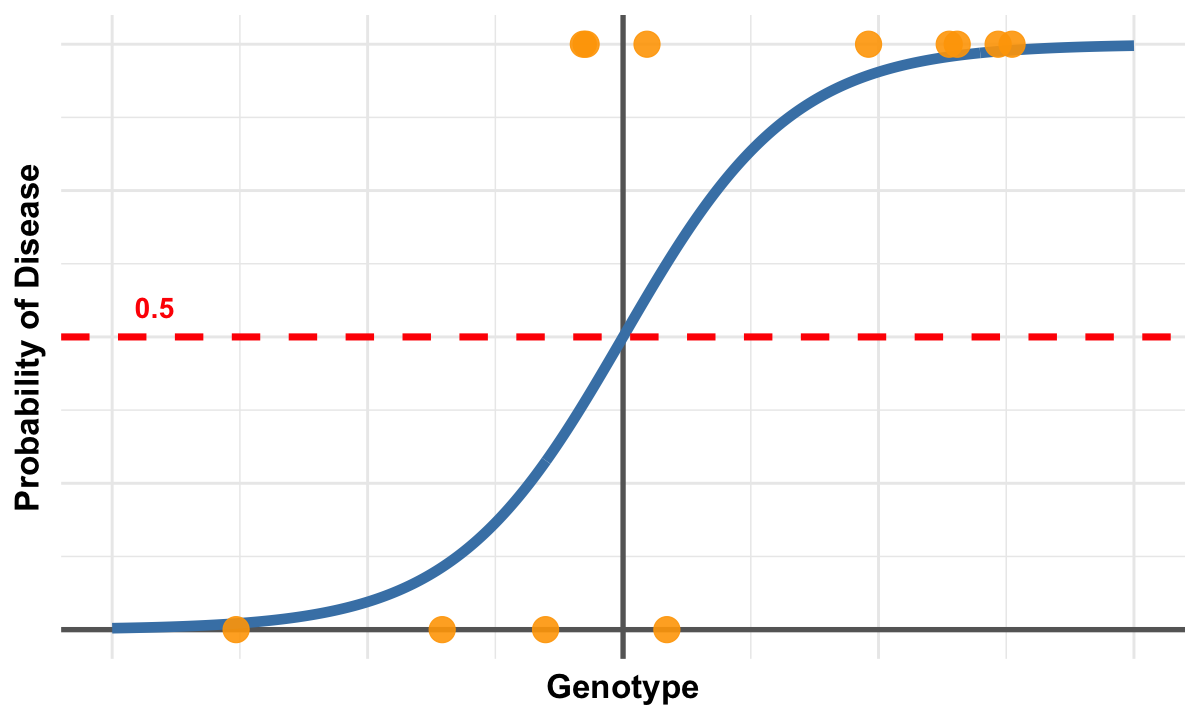

In [41]:
# Load necessary library
library(ggplot2)

# Set plot size
options(repr.plot.width = 10, repr.plot.height = 6)

# Define logistic function
logistic <- function(x, beta0 = 0, beta1 = 1) {
  1 / (1 + exp(-(beta0 + beta1 * x)))
}

# Generate logistic curve
x_vals <- seq(-6, 6, length.out = 300)
y_vals <- logistic(x_vals)
curve_data <- data.frame(x = x_vals, y = y_vals)

# Simulate fewer binary data points
set.seed(123)
x_sim <- runif(12, min = -5, max = 5)
prob <- logistic(x_sim)
y_sim <- rbinom(length(x_sim), size = 1, prob = prob)
points_data <- data.frame(x = x_sim, y = y_sim)

# Plot
p <- ggplot() +
  geom_hline(yintercept = 0, color = "gray40", linewidth = 1.5) +
  geom_vline(xintercept = 0, color = "gray40", linewidth = 1.5) +
  geom_line(data = curve_data, aes(x = x, y = y), 
            color = "steelblue", linewidth = 3) +
  geom_point(data = points_data, aes(x = x, y = y), 
             color = "orange", size = 7, alpha = 0.9) +
  geom_hline(yintercept = 0.5, linetype = "dashed", 
             color = "red", linewidth = 2) +
  annotate("text", x = -5.5, y = 0.55, label = "0.5", 
           color = "red", size = 6, fontface = "bold") +
  labs(x = "Genotype", y = "Probability of Disease") +
  theme_minimal(base_size = 18) +
  theme(
    plot.title = element_blank(),
    axis.title = element_text(size = 20, face = "bold"),
    axis.text = element_blank(),
    axis.ticks = element_blank()
    # Y-axis title left at default angle (90 degrees)
  )
print(p)

# # Save with transparent background
# ggsave("./cartoons/odds_ratio.png", plot = p, 
#        width = 10, height = 6, 
#        bg = "transparent", 
#        dpi = 300)
